In [ ]:
!pip install sdv

In [2]:
from sdv.timeseries import PAR
from sdv.demo import load_timeseries_demo
import pandas as pd

In [3]:
demo_data = load_timeseries_demo()
len(demo_data)
entity_columns = ['Symbol']
context_columns = ['MarketCap', 'Sector', 'Industry']
sequence_index = 'Date'

In [4]:
model = PAR(   entity_columns=entity_columns, context_columns=context_columns,
            sequence_index=sequence_index, verbose=True)

In [5]:
# model.fit(demo_data)

https://sdv.dev/SDV/user_guides/timeseries/par.html

looks perfect for our uses - depending on the shape/attributes of the kaggle dataset!

will take a stab at fitting a model on our data when I have it!

In [6]:
sensor = pd.read_csv('sensor.csv')

In [ ]:
sensor.head()

In [8]:
# only keeping cols w high var in pca analysis.
data = sensor[['timestamp', 'sensor_25', 'sensor_11', 'sensor_36', 'sensor_34']]

In [ ]:
print(data.dtypes)

In [ ]:
data['timestamp']= pd.to_datetime(data['timestamp'])
print(data.dtypes)

In [11]:
data.head()

,timestamp,sensor_25,sensor_11,sensor_36,sensor_34
0,2018-04-01 00:00:00,741.7151,47.52422,195.0655,171.9375
1,2018-04-01 00:01:00,741.7151,47.52422,195.0655,171.9375
2,2018-04-01 00:02:00,740.8031,48.17723,200.9694,169.9820
3,2018-04-01 00:03:00,739.2722,48.65607,193.1689,166.4987
4,2018-04-01 00:04:00,737.6033,49.06298,193.8770,164.7498


In [12]:
one_k_rows = data.head(1000)

In [13]:
sequence_index = 'timestamp'
model = PAR(sequence_index = sequence_index, verbose=True)

In [14]:
model.fit(one_k_rows)

PARModel(epochs=128, sample_size=1, cuda='cpu', verbose=True) instance created


Epoch 128 | Loss -548.5731201171875: 100%|██████████| 128/128 [04:20<00:00,  2.04s/it] 


In [15]:
sample = model.sample(1)

100%|██████████| 1/1 [00:59<00:00, 59.25s/it]


<AxesSubplot:xlabel='timestamp'>

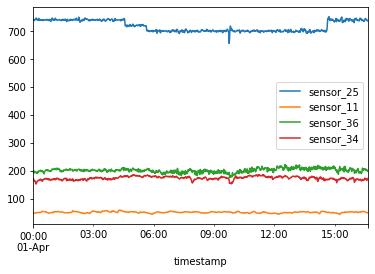

In [16]:
import matplotlib.pyplot as plt


one_k_rows.set_index('timestamp').plot()

<AxesSubplot:xlabel='timestamp'>

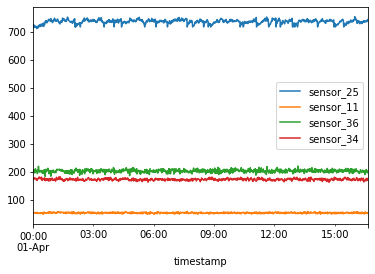

In [17]:
sample.set_index('timestamp').plot()

# INITIAL TAKEAWAYS:

- Fitting a model on cpu takes a lot of time - even for just 1,000 rows out of 200,000 rows of data.
  - ideally would like to try on GPU to see how much that helps as it's an option with this library.


- for that model, it appears on first glance that the variance in our sample is not really too similar to our true data. would need to do more testing to determine that.